In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
df_1 = pd.read_csv("Topo_features_Mali_500_30_4_3.csv", index_col=0)

for file_path in os.listdir():
    if "Topo_features_Mali_500_30" in file_path and file_path!="Topo_features_Mali_500_30_4_3.csv":
        df_2 = pd.read_csv(file_path, index_col=0)
        df_1 = pd.concat([df_1, df_2])

df_1

,CODE_OUVRA,LON,LAT,DATE,NS,precipitation,ndvi,ridge_row,ridge_col,stream_row,...,long_grad_var,long_grad_skew,long_grad_kurt,long_grad_max,long_hessian_mean,long_hessian_var,long_hessian_skew,long_hessian_kurt,long_hessian_max,ratio_top
2364,02F004568,-8.352548,12.336771,2005-05-14,4.50,0.0,0.0,4101.0,1857.0,4087.0,...,0.413523,-0.075491,-0.946160,0.721349,-0.000005,-0.000005,-0.287090,-0.013055,0.000072,0.207126
2365,02F004569,-8.345389,12.238525,2005-05-15,3.60,0.0,0.0,4426.0,1887.0,4433.0,...,0.519953,0.256516,-0.803409,0.950538,-0.000009,-0.000009,0.620238,0.904717,0.000062,0.383902
2366,02F004570,-8.470403,12.267189,2005-05-17,7.50,0.0,0.0,4342.0,1422.0,4338.0,...,0.847856,0.594511,-0.552793,1.991668,-0.000016,-0.000016,0.190261,-0.124701,0.000151,0.465228
2370,02F004574,-8.326786,12.335019,2005-05-22,9.00,0.0,0.0,4113.0,1924.0,4084.0,...,0.574592,0.150679,-1.068784,1.178608,-0.000014,-0.000014,0.332470,-0.416158,0.000054,0.370507
2381,02F004647,-8.294374,12.170313,2005-12-13,3.75,0.0,0.0,4666.0,2020.0,4678.0,...,0.565465,-0.212042,-1.189067,1.174585,-0.000011,-0.000011,0.310636,-0.452687,0.000108,0.386644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713.0,2054.0,717.0,...,1.249539,-0.241649,0.164787,2.047355,-0.000018,-0.000018,-1.365508,1.819717,0.000068,0.637041
2554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594.0,2089.0,620.0,...,0.972483,0.249883,-0.383816,1.922278,-0.000014,-0.000014,-0.335659,-0.181494,0.000100,0.371567
2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,654.0,2054.0,620.0,...,1.368483,-0.947082,0.750277,2.139728,-0.000005,-0.000005,-0.166931,-0.608077,0.000087,0.651323
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,718.0,410.0,707.0,...,0.790240,-0.362328,-0.692451,1.394606,0.000015,0.000015,0.883866,1.016272,0.000162,0.011511


In [4]:
df_topo = df_1.drop(["CODE_OUVRA", "LON", "LAT", "DATE", "NS", "precipitation", "ndvi"], axis=1).dropna(axis=0) #Attention: la colonne "CODE_OUVRA est pour le Mali ici
                                                                                                                #Pour les autres pays cette colonne peut changer de nom

In [5]:
df_meteo = pd.read_csv("Meteo_features_Mali.csv", index_col=0)

df = pd.concat([df_meteo, df_topo], axis=1).dropna(axis=0)

In [6]:
df

,CODE_OUVRA,LON,LAT,DATE,NS,ndvi,precipitation,area,ridge_row,ridge_col,...,long_grad_var,long_grad_skew,long_grad_kurt,long_grad_max,long_hessian_mean,long_hessian_var,long_hessian_skew,long_hessian_kurt,long_hessian_max,ratio_top
2315,03F006211,-6.887778,11.728610,2003-01-01,5.93,0.448889,1.000907,176.940765,1257.0,2114.0,...,0.459872,1.052223,0.710919,1.490016,-0.000011,-0.000011,-0.116851,-0.360237,0.000071,0.442606
2316,02P002811,-8.142399,11.959121,2003-01-01,10.00,0.444570,0.927724,193.331834,432.0,2578.0,...,1.069507,0.237923,-1.077389,2.220793,-0.000011,-0.000011,0.719154,0.329466,0.000140,0.817750
2317,02P002809,-8.143548,11.958703,2003-01-01,10.00,0.444570,0.927724,193.331834,432.0,2578.0,...,1.109164,0.113044,-1.190168,2.220793,-0.000011,-0.000011,0.690626,0.016789,0.000140,0.875423
2318,03F000790,-6.896576,11.094717,2003-02-24,9.28,0.323680,0.028976,166.510158,3552.0,2052.0,...,0.777849,0.468111,-0.700709,1.702436,-0.000025,-0.000025,-0.169396,0.132300,0.000080,0.547550
2319,03F006308,-6.843611,11.718610,2003-06-13,6.00,0.360793,1.975058,176.940765,1340.0,2271.0,...,0.506411,1.908078,2.602818,2.675167,-0.000033,-0.000033,-0.933993,-0.070721,0.000071,0.576903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,03F007507,-7.815733,11.798217,2014-05-26,7.10,0.331319,1.734507,156.729151,1067.0,3788.0,...,0.704166,-0.000437,-0.583903,1.110357,-0.000009,-0.000009,0.459118,0.154847,0.000055,0.364193
2594,03F007495,-7.528267,11.847887,2014-05-26,4.88,0.355317,1.505379,172.594693,861.0,4784.0,...,0.693504,0.703065,-0.365937,1.792096,-0.000011,-0.000011,0.763617,1.199099,0.000141,0.464640
2595,03F007475,-7.699064,11.302908,2014-06-20,25.35,0.440784,3.008236,135.281888,2810.0,4193.0,...,0.962771,0.550917,0.181642,2.048514,0.000014,0.000014,1.804779,6.342781,0.000295,0.261995
2596,02F006546,-8.149762,11.711751,2015-01-01,13.76,0.000000,0.000000,0.000000,1350.0,2562.0,...,1.182922,-0.858928,0.026980,1.819063,-0.000013,-0.000013,0.343700,0.367845,0.000135,0.769677


In [7]:
import folium

# Centre de la carte (moyenne des coordonnées)
center_lat, center_lon = df["LAT"].mean(), df["LON"].mean()

# Créer la carte
m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# Ajouter les points
for _, row in df.iterrows():
    color = "red" if row["LON"] < -6.2 else "blue"  # Délimitation
    folium.CircleMarker(
        location=[row["LAT"], row["LON"]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
    ).add_to(m)

# Ajouter une ligne pour délimiter -6.2
folium.PolyLine(
    locations=[[df["LAT"].min(), -6.2], [df["LAT"].max(), -6.2]],
    color="black",
    weight=2,
    opacity=0.7
).add_to(m)

# Afficher la carte
m


In [10]:
train_index = df[df["LON"]<-6.2].index
test_index = df[df["LON"]>=-6.2].index

print(len(train_index), len(test_index))

200 74


In [ ]:
X_topo = df.drop([
    "CODE_OUVRA",
    "LON",
    "LAT",
    "DATE",
    "NS",
    "ridge_row",
    "ridge_col",
    "stream_row",
    "stream_col",
], axis=1)
y = df["NS"]

X_train = X_topo.loc[train_index]
y_train = y.loc[train_index]
X_test = X_topo.loc[test_index]
y_test = y.loc[test_index]

model = RandomForestRegressor(n_estimators=50, random_state=42)

#Entrainement du modèle à partir de toutes les features (résultats pas terribles)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

RMSE (en %): 40.508 %
Corrélation entre les prédictions et les vraies valeurs: 48.199999999999996 %


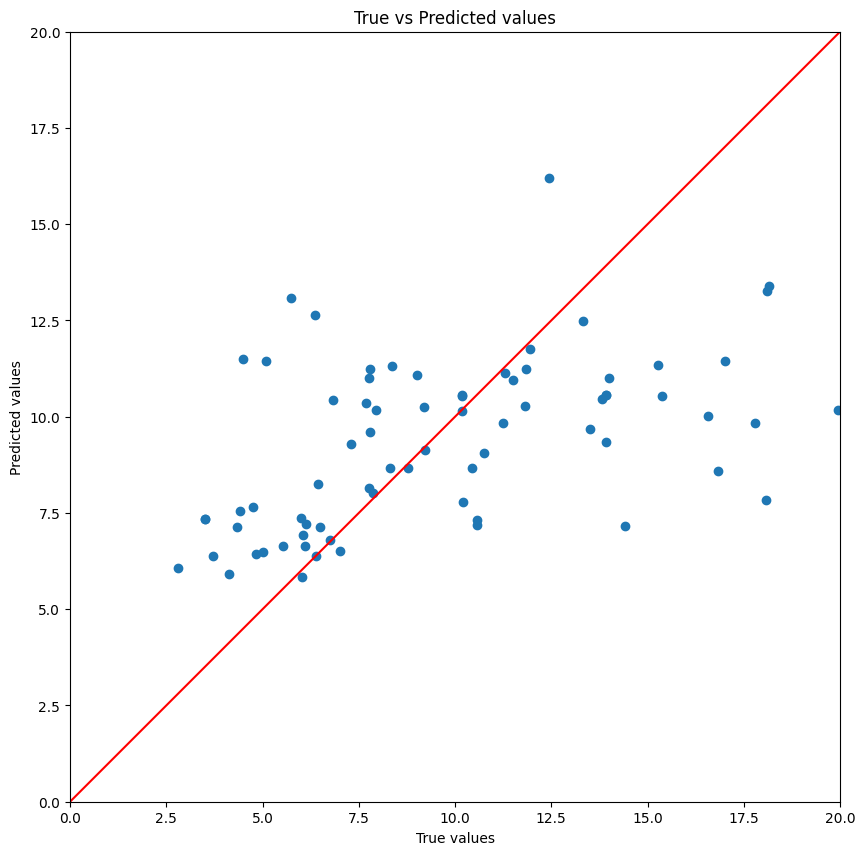

In [13]:
#On visualise ici les résultats sur le dataset de test de notre modèle entraîné

y_pred = model.predict(X_test)

print(f"RMSE (en %): {round(np.sqrt(np.mean((y_test - y_pred)**2))/np.mean(y_test) * 100, 3)} %")
print(f"Corrélation entre les prédictions et les vraies valeurs: {np.corrcoef(y_test, y_pred)[0, 1].round(3)*100} %")

max_limit = max(20, 20)

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)

T = np.arange(0, max_limit + 1)
plt.plot(T, T, 'r')

plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')

plt.show()

In [14]:
#On recommence mais en testant itérativement plusieurs combinaisons (impossible de tout tester car cela prendrait trop de temps)
#Donc on arrête de faire tourner la cellule au bout d'un moment ~20 minutes par exemple

results = []

for i in range(6, len(X_topo.columns) + 1): #6 représente ici la longueur des combinaisons de features à tester. On peut tester plusieurs longueurs différentes
    for j, subset in enumerate(combinations(X_topo.columns, i)):
        if j%100==0:
            print(j)
        X_subset = X_topo[list(subset)]

        X_train = X_subset.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X_subset.loc[test_index]
        y_test = y.loc[test_index]  
        
        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(np.mean((y_test - y_pred)**2)) / np.mean(y_test) * 100
        correlation = np.corrcoef(y_test, y_pred)[0, 1]
        
        results.append({
            "features": subset,
            "rmse": round(rmse, 3),
            "correlation": round(correlation, 3)
        })

results_df = pd.DataFrame(results)

best_rmse = results_df.sort_values(by="rmse", ascending=True).head(10)
print("Top 10 combinaisons avec les meilleurs RMSE :")
print(best_rmse)

best_corr = results_df.sort_values(by="correlation", ascending=False).head(10)
print("\nTop 10 combinaisons avec les meilleures corrélations :")
print(best_corr)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


KeyboardInterrupt: 

In [15]:
#On affiche les résultats par ordre décroissant de résultats

results_df = pd.DataFrame(results)

best_rmse = results_df.sort_values(by="rmse", ascending=True).head(10)
print("Top 10 combinaisons avec les meilleurs RMSE :")
display(best_rmse)

best_corr = results_df.sort_values(by="correlation", ascending=False).head(10)
print("\nTop 10 combinaisons avec les meilleures corrélations :")
print(best_corr)

Top 10 combinaisons avec les meilleurs RMSE :


,features,rmse,correlation
4556,"(ndvi, precipitation, area, ratio_alt, ridge_g...",36.901,0.618
4557,"(ndvi, precipitation, area, ratio_alt, ridge_g...",36.901,0.618
4745,"(ndvi, precipitation, area, ratio_alt, short_g...",37.135,0.612
4470,"(ndvi, precipitation, area, ratio_alt, stream_...",37.211,0.598
4469,"(ndvi, precipitation, area, ratio_alt, stream_...",37.211,0.598
4770,"(ndvi, precipitation, area, ratio_alt, short_g...",37.404,0.612
4751,"(ndvi, precipitation, area, ratio_alt, short_g...",37.404,0.612
4753,"(ndvi, precipitation, area, ratio_alt, short_g...",37.413,0.610
4772,"(ndvi, precipitation, area, ratio_alt, short_g...",37.413,0.610
6579,"(ndvi, precipitation, area, ratio_dist, short_...",37.419,0.615



Top 10 combinaisons avec les meilleures corrélations :
                                               features    rmse  correlation
6339  (ndvi, precipitation, area, ratio_dist, ridge_...  37.449        0.628
6340  (ndvi, precipitation, area, ratio_dist, ridge_...  37.449        0.628
6316  (ndvi, precipitation, area, ratio_dist, ridge_...  37.449        0.628
6315  (ndvi, precipitation, area, ratio_dist, ridge_...  37.449        0.628
1933  (ndvi, precipitation, area, alt_top, short_gra...  37.959        0.628
1914  (ndvi, precipitation, area, alt_top, short_gra...  37.959        0.628
1819  (ndvi, precipitation, area, alt_top, ridge_hes...  37.942        0.622
1820  (ndvi, precipitation, area, alt_top, ridge_hes...  37.942        0.622
1795  (ndvi, precipitation, area, alt_top, ridge_hes...  37.942        0.622
1796  (ndvi, precipitation, area, alt_top, ridge_hes...  37.942        0.622


In [49]:
best_rmse.iloc[0]["features"]

('ndvi',
 'precipitation',
 'area',
 'ratio_alt',
 'ridge_grad_skew',
 'short_grad_mean')

In [ ]:
X = df[[
'ndvi',
 'precipitation',
 'area',
 'ratio_alt',
 'ridge_grad_skew',
 'short_grad_mean',
]]
y = df["NS"]

X_train = X.loc[train_index]
y_train = y.loc[train_index]
X_test = X.loc[test_index]
y_test = y.loc[test_index]

model = RandomForestRegressor(n_estimators=50, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [51]:
y_pred = model.predict(X_test)

print(f"RMSE (en %): {round(np.sqrt(np.mean((y_test - y_pred)**2))/np.mean(y_test) * 100, 3)} %")
print(f"Corrélation entre les prédictions et les vraies valeurs: {np.corrcoef(y_test, y_pred)[0, 1].round(3)*100} %")

RMSE (en %): 36.901 %
Corrélation entre les prédictions et les vraies valeurs: 61.8 %
